[Building Your First LLM: A Beginner’s Guide to Language Model Development: Step-by-Step Tutorial on Creating a Language Model Using Python](https://configr.medium.com/building-your-first-llm-a-comprehensive-beginners-guide-to-language-model-development-4c1cfd4e797b)
- TensorFlow, NLTK, NumPy, Pandas
- NLTK Brown Corpus, LSTM(Long Short-Term Memory) network

In [5]:
# !pip install tensorflow nltk numpy pandas

In [4]:
import tensorflow as tf
import nltk
import numpy as np
import pandas as pd

In [6]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to D:\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [41]:
from nltk.corpus import brown
data = brown.sents()
print(data[:5])

# DEBUG: more data more accurate
data = data[:100]

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'rep

# Preprocessing

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to D:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import string

def preprocess(data):
    stop_words = set(stopwords.words('english'))
    processed_data = []
    for sentence in data:
        sentence = [word.lower() for word in sentence if word.isalpha()]
        sentence = [word for word in sentence if word not in stop_words]
        processed_data.append(sentence)
    return processed_data

processed_data = preprocess(data)

In [24]:
processed_data[:5]

[['fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'investigation',
  'recent',
  'primary',
  'election',
  'produced',
  'evidence',
  'irregularities',
  'took',
  'place'],
 ['jury',
  'said',
  'presentments',
  'city',
  'executive',
  'committee',
  'charge',
  'election',
  'deserves',
  'praise',
  'thanks',
  'city',
  'atlanta',
  'manner',
  'election',
  'conducted'],
 ['term',
  'jury',
  'charged',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'investigate',
  'reports',
  'possible',
  'irregularities',
  'primary',
  'ivan',
  'allen'],
 ['relative',
  'handful',
  'reports',
  'received',
  'jury',
  'said',
  'considering',
  'widespread',
  'interest',
  'election',
  'number',
  'voters',
  'size',
  'city'],
 ['jury',
  'said',
  'find',
  'many',
  'registration',
  'election',
  'laws',
  'outmoded',
  'inadequate',
  'often',
  'ambiguous']]

# Data

In [43]:
# Tokenization and Sequencing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_data)
sequences = tokenizer.texts_to_sequences(processed_data)

# Creating Input and Output Pairs
input_sequences = []
for sequence in sequences:
    for i in range(1, len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)

# Padding Sequences
max_seq_length = max([len(seq) for seq in input_sequences])
print("max_seq_length", max_seq_length)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre')
print(input_sequences[:5])

max_seq_length 27
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  4  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   4  3 28]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4
   3 28  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  3
  28  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  3 28
   2  1 29]]


In [44]:
# Splitting Inputs and Labels
import numpy as np

input_sequences = np.array(input_sequences)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]


vocab_size = len(tokenizer.word_index) + 1  # To account for padding token
print("vocab_size", vocab_size)

# Convert labels to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

vocab_size 652


# Model

In [ ]:
# LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# xxx: Fine-Tuning, Optimization

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_seq_length - 1))
model.add(LSTM(128))
model.add(Dense(vocab_size, activation='softmax'))

In [51]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training

In [47]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Starting the Training Process
history = model.fit(X, y, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.0176 - loss: 6.4790
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0236 - loss: 6.4518
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0242 - loss: 6.2938
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0243 - loss: 6.2202
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0248 - loss: 6.1771
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0239 - loss: 6.0980
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0234 - loss: 6.1004
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0266 - loss: 6.0651
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0263 - loss: 6.0481
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0263 - loss: 5.9638
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0301 - loss: 5.9585
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0255 - loss: 5.9023
E

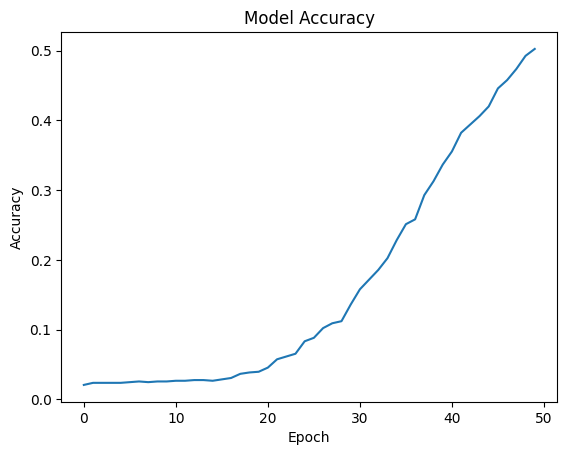

In [48]:
# Plotting Training History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Test

In [49]:
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=1)[0]
        predicted_word = tokenizer.index_word[predicted_word_index]
        seed_text += " " + predicted_word
    return seed_text

print(generate_text("The future of AI", 10))

The future of AI jury said fulton fulton fulton fulton election city city city


xxx: no meaning output due to small dataset, non-tuned model.

# Deployment

- `model.save('model.h5')`
- Flask